In [1]:
#Testing so that for once and for all we can be sure that these three fundemental parts of our program are fucntioning 
#nominally and to decipher how they should be applied 


In [2]:
def custom_normalisation(data, reconstruction_threshold, time_dimension=100):
    data = ((data / time_dimension) / (1/(1-reconstruction_threshold))) + reconstruction_threshold
    for row in data:
        for i, ipt in enumerate(row):
            if ipt == reconstruction_threshold:
                row[i] = 0
    return data

In [3]:
def custom_renormalisation(data, reconstruction_threshold, time_dimension=100):
    data = np.where(data > reconstruction_threshold, ((data - reconstruction_threshold)*(1/(1-reconstruction_threshold)))*(time_dimension), data)
    return data

In [37]:
def reconstruct_3DNEW(data, reconstruction_threshold):
    data_output = []
    for cdx, row in enumerate(data):
        for idx, num in enumerate(row):
            #if num > reconstruction_threshold:  #should this be larger than or equal to??? depends how we deal with the 0 slice problem
            data_output.append([cdx,idx,num])
    return np.array(data_output)

In [5]:
def reconstruct_3D2(data, reconstruction_threshold):
    data_output = []
    for cdx, row in enumerate(data):
        for idx, num in enumerate(row):
            if num > reconstruction_threshold:  #should this be larger than or equal to??? depends how we deal with the 0 slice problem
                num_renorm = custom_renormalisation(num)
                data_output.append([cdx,idx,num_renorm])
    return np.array(data_output)

In [6]:
import numpy as np
import matplotlib.pyplot as plt
time_dimension=100

In [7]:
dummy_data = np.array([(1,0,0),(0,50,0),(0,0,100)])
print(dummy_data)

[[  1   0   0]
 [  0  50   0]
 [  0   0 100]]


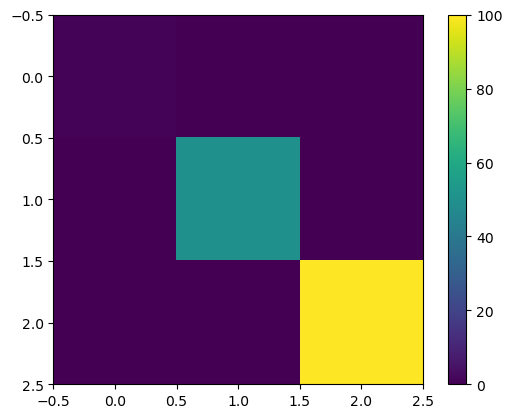

In [8]:
plt.imshow(dummy_data, vmin=0, vmax=100)
plt.colorbar()
plt.show()

In [9]:
#First thing to note is that very low tof values i.e 1 are much more likely to get categorised as a zero than very high TOF values
#this is somthing we should be aware of and try and think of a soloution to!

In [10]:
reconstruction_threshold = 0.5
data_norm = custom_normalisation(dummy_data, reconstruction_threshold, time_dimension)
print(data_norm)

[[0.505 0.    0.   ]
 [0.    0.75  0.   ]
 [0.    0.    1.   ]]


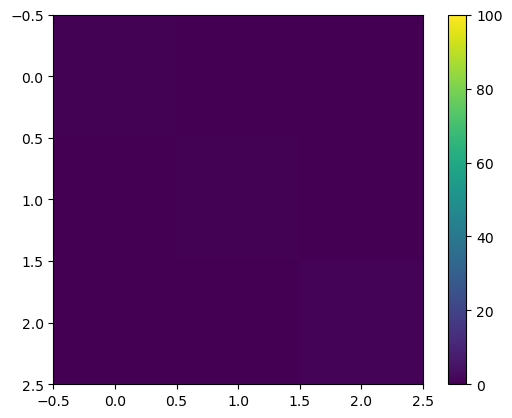

In [11]:
plt.imshow(data_norm, vmin=0, vmax=100)
plt.colorbar()
plt.show()

In [12]:
#Next thing i see is that the vmin and vmax arguments do not fucntion as i belived and intended. They do seem to set the 
#range (min and max) cooreesponding to the scale for the colour bar and colouring of the plot however the bottom right 
#square has a value of 1 not 100 and yet it still is coloured at the max value of yellow (seen as 100 on the colour bar)

#NOTE! I think this is due to the swtich from integer values to float vals (for luminance imshow expects int in 
#range 0-255 or float in range 0. to 1.)

#This definatly explains some of the changes in brightness we have witnessed in the results of the main code 


#scratch that i was plotting the original dummy data everytime in error not the processed norm values
#vmin and vmax do indeed seem to work correctly

In [13]:
#Testing the above theory by instering float vals above 1 to see how they render in colour/effect the scaling of the point with value of 1



In [14]:
reconstruction_threshold = 0.5
data_norm = custom_normalisation(dummy_data, reconstruction_threshold, time_dimension)
print(data_norm)

[[0.505 0.    0.   ]
 [0.    0.75  0.   ]
 [0.    0.    1.   ]]


In [15]:
data_norm[0][2] = 50.0
print(data_norm)

[[ 0.505  0.    50.   ]
 [ 0.     0.75   0.   ]
 [ 0.     0.     1.   ]]


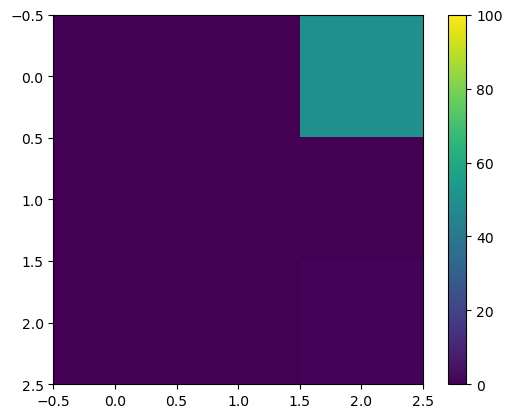

In [16]:
plt.imshow(data_norm, vmin=0, vmax=100)
plt.colorbar()
plt.show()

In [17]:
# Testing other reconstrucion thresholds

In [18]:
reconstruction_threshold = 0.1
data_norm = custom_normalisation(dummy_data, reconstruction_threshold, time_dimension)
print(data_norm)

[[0.109 0.    0.   ]
 [0.    0.55  0.   ]
 [0.    0.    1.   ]]


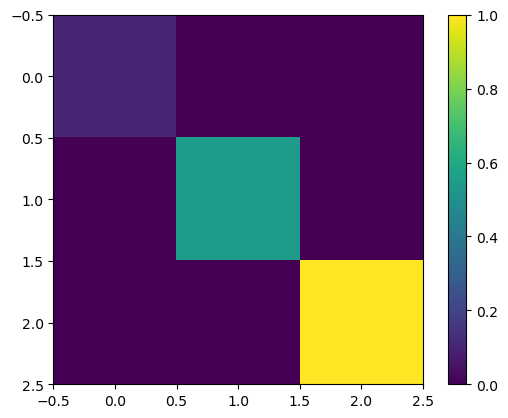

In [19]:
plt.imshow(data_norm, vmin=0, vmax=1)
plt.colorbar()
plt.show()

In [30]:
reconstruction_threshold = 0.9
data_norm = custom_normalisation(dummy_data, reconstruction_threshold, time_dimension)
print(data_norm)

[[0.901 0.    0.   ]
 [0.    0.95  0.   ]
 [0.    0.    1.   ]]


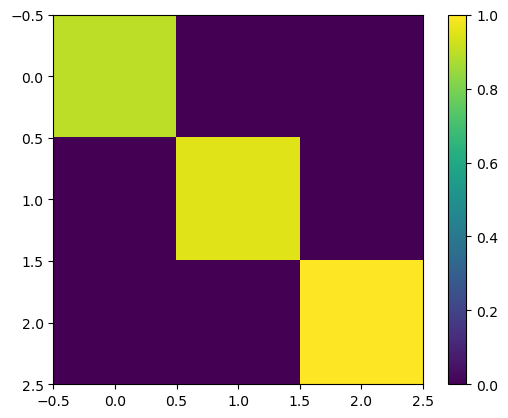

In [31]:
plt.imshow(data_norm, vmin=0, vmax=1)
plt.colorbar()
plt.show()

In [32]:
# The variable reconstruction value scaling in the custom norm works perfectly since my last bug check and rebuild detailed (link to page here).


In [33]:
renorm_data = custom_renormalisation(data_norm, reconstruction_threshold, time_dimension)

In [38]:
data_3d = reconstruct_3D(dummy_data, reconstruction_threshold)
norm_data_3d = reconstruct_3D(data_norm, reconstruction_threshold)
renorm_data_3d = reconstruct_3D(renorm_data, reconstruction_threshold)


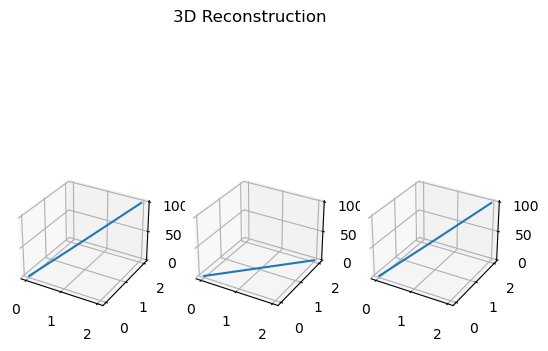

In [42]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, subplot_kw={'projection': '3d'})
ax1.plot(data_3d[:,0], data_3d[:,1], data_3d[:,2])
ax1.set_zlim(0, time_dimension)
ax2.plot(norm_data_3d[:,0], norm_data_3d[:,1], norm_data_3d[:,2])
ax2.set_zlim(0, time_dimension)
ax3.plot(renorm_data_3d[:,0], renorm_data_3d[:,1], renorm_data_3d[:,2])
ax3.set_zlim(0, time_dimension)
fig.suptitle(f"3D Reconstruction")
plt.show()